In [1]:
import os
import h5py
import json
import keras
import random 
import imageio
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn import tree
from keras import backend as K
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

Using TensorFlow backend.


In [2]:
Data = pd.read_csv('DsDnsPrScTch.csv') 

C:\Users\REDLINE PC\.conda\envs\Laptop\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Data["Teacher First Project Posted Date"]=pd.to_datetime(Data["Teacher First Project Posted Date"])
Data["Project Fully Funded Date"]=pd.to_datetime(Data["Project Fully Funded Date"])
Data["Project Expiration Date"]=pd.to_datetime(Data["Project Expiration Date"])
Data["Project Posted Date"]=pd.to_datetime(Data["Project Posted Date"])
Data["Donation Received Date"]=pd.to_datetime(Data["Donation Received Date"])
Data["Number of dates since posted"]=Data.loc[:,"Donation Received Date"]-Data.loc[:,"Project Posted Date"]

In [4]:
Data.drop("Unnamed: 0", inplace=True, axis=1)
Data.drop("Unnamed: 0.1", inplace=True, axis=1)

In [5]:
Data.dtypes

Project ID                                         object
Donation ID                                        object
Donor ID                                           object
Donation Included Optional Donation                object
Donation Amount                                   float64
Donor Cart Sequence                                 int64
Donation Received Date                     datetime64[ns]
Donor City                                         object
Donor State                                        object
Donor Is Teacher                                   object
Donor Zip                                          object
School ID                                          object
Teacher ID                                         object
Teacher Project Posted Sequence                     int64
Project Type                                       object
Project Title                                      object
Project Essay                                      object
Project Short 

In [6]:
# from pandas import DataFrame
# import seaborn as sn
# t=Data.columns
# t=t[::-1]
# df = DataFrame(Data[t],columns=t)

# fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
# corrMatrix = df.corr()
# sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 10},ax=ax)

C:\Users\REDLINE PC\.conda\envs\Laptop\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    743945.000000
mean          0.462287
std           0.332363
min           0.000030
25%           0.138487
50%           0.480108
75%           0.742170
max           2.550013
Name: Raised funds to project cost ratio, dtype: float64


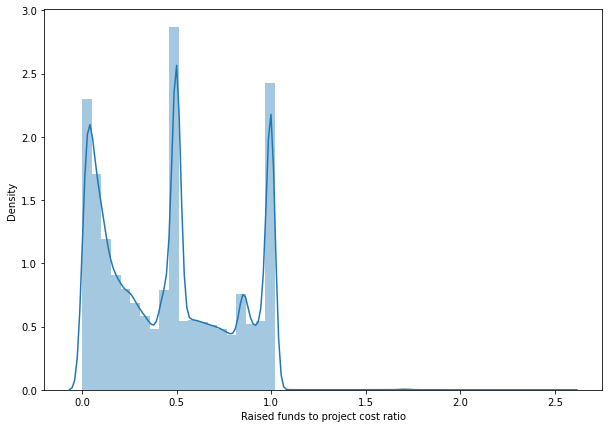

In [7]:
T=pd.Timedelta('30 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount","Project Cost",
         "Project Posted Date","Project Expiration Date","Donation Received Date","Project Short Description_polarity",
        "Project Short Description_subjectivity","Project Essay_polarity","Project Essay_subjectivity",
         "Project Need Statement_polarity","Project Need Statement_subjectivity"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]
sub_Data["Raised funds to project cost ratio"]=sub_Data["Donation Amount"]/sub_Data["Project Cost"]
Grouped_data=sub_Data.groupby(["Project ID"]).sum()
Grouped_data_Final = sub_Data.groupby(["Project ID"]).max()
Grouped_data_Final["Raised funds to project cost ratio"]=Grouped_data["Raised funds to project cost ratio"]

f, axes = plt.subplots(1, 1,figsize=(10,7))

y="Raised funds to project cost ratio"
q1 = Grouped_data_Final[y].quantile(0)
q3 = Grouped_data_Final[y].quantile(1)
mask = Grouped_data_Final[y].between(q1, q3, inclusive=True)
iqr = Grouped_data_Final.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y )
print(iqr.describe())


In [8]:
Grouped_data_Final[y]

Project ID
000009891526c0ade7180f8423792063    0.207673
00000ce845c00cbf0686c992fc369df4    0.683031
00002d44003ed46b066607c5455a999a    0.399810
00002eb25d60a09c318efbd0797bffb5    0.107870
0000300773fe015f870914b42528541b    1.000000
                                      ...   
ffff8bee61b72c484b10e43aa9e35bc9    0.524360
ffff98098650c5e07fa7f40030fbe9e2    0.332200
ffff9bb21699f79266cc7cbc208890a0    0.256458
ffffd8f0fbfa10b99efe90a5ee13c5df    0.500000
fffffcc42d1bf7ab742a4fa2d820f9f0    0.481306
Name: Raised funds to project cost ratio, Length: 743945, dtype: float64

C:\Users\REDLINE PC\.conda\envs\Laptop\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    870802.000000
mean          0.555950
std           0.337268
min           0.000026
25%           0.255094
50%           0.500019
75%           0.889879
max           2.550013
Name: Raised funds to project cost ratio, dtype: float64


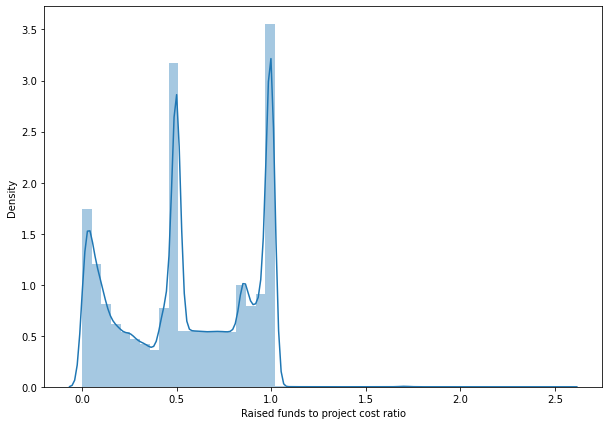

In [9]:
T=pd.Timedelta('120 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount","Project Cost",
         "Project Posted Date","Project Expiration Date","Donation Received Date","Project Short Description_polarity",
        "Project Short Description_subjectivity","Project Essay_polarity","Project Essay_subjectivity",
         "Project Need Statement_polarity","Project Need Statement_subjectivity"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]
sub_Data["Raised funds to project cost ratio"]=sub_Data["Donation Amount"]/sub_Data["Project Cost"]
Grouped_data=sub_Data.groupby(["Project ID"]).sum()
Grouped_data_Final = sub_Data.groupby(["Project ID"]).max()
Grouped_data_Final["Raised funds to project cost ratio"]=Grouped_data["Raised funds to project cost ratio"]

f, axes = plt.subplots(1, 1,figsize=(10,7))

y="Raised funds to project cost ratio"
q1 = Grouped_data_Final[y].quantile(0)
q3 = Grouped_data_Final[y].quantile(1)
mask = Grouped_data_Final[y].between(q1, q3, inclusive=True)
iqr = Grouped_data_Final.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y )
print(iqr.describe())

G120=Grouped_data_Final

In [10]:
#===============================================================================================
#                                  Model Training Funstion
#===============================================================================================

def Train_Model(Classifier, Model_variables_con,Model_variables_cat,Data,
                Time_period_indays=30,K=100,Fund_Ratio_treshold=0.142):
    # Time_period should be in days 
    # K is the Top-K value
    print("Fund_Ratio_treshold", Fund_Ratio_treshold)
    
    #=================================== Initiate the List Variables ================================
    
    Time_points = []
    Output=dict()
    Output["Overall_Training_Accuracy"], Output["Overall_Training_Precision"], Output["Overall_Training_Recall"] = list(),list(),list()
    Output["Overall_Testing_Accuracy"], Output["Overall_Testing_Precision"], Output["Overall_Testing_Recall"] = list(),list(),list()
    Output["Top_K_Accuracy"], Output["Top_K_Precision"], Output["Top_K_Recall"] = list(),list(),list()

    #=================================== Initiate the Columns ======================================
    
    print("Initiatnig the Columns")
    Main_Variables = list(set(["Project ID","Project Posted Date","Project Expiration Date","Donation Received Date",
         "Project Cost","Donation Amount","Number of dates since posted"]+Model_variables_cat+Model_variables_con))
    Model_variables = Model_variables_con.copy()
    print("Variables considered in model training")
    for i in sub_var: print(">",i,i in Data.columns) # print all variables considered.
    print()
    Data["Number of dates since posted"]=Data.loc[:,"Donation Received Date"]-Data.loc[:,"Project Posted Date"]
    sub_Data = Data.loc[:,Main_Variables]
    

    #================================= One-Hot-Encoding Columns to remove ==========================
    
    print("One-Hot-Encoding removing columns identification")
    Sub_Variables_to_remove=dict()
    for i in Model_variables_cat:
        sub_variables = Data[i].unique()
        Model_variables+=sorted([i+"_"+str(j) for j in Data[i].unique()])
        Model_variables.remove(i+"_"+str(sub_variables[0]))
        Sub_Variables_to_remove[i]=sub_variables[0]
        
    
    #=================================== Initiate Time Variables ====================================
    
    print("Initiate Time Variables")
    MaxT = pd.Timestamp("2018-05-01 00:00:00")  #max(Data["Project Posted Date"])
    MinT = pd.Timestamp("2013-01-01 00:00:00")  #min(Data["Project Posted Date"])
    Time_period = timedelta(days=Time_period_indays)  
    T_current = MinT- Time_period +timedelta(days=120) 
    sub_Data["Number of dates since posted"] = sub_Data["Number of dates since posted"]/ np.timedelta64(1, 'D')
    
    
    #=================================== Loop over time frams =======================================
    
    print("Time iteration is starting\n")
    while (T_current<MaxT-Time_period):
        
        T_current = T_current+ Time_period
        Time_points+=[T_current]
        T_Train_start = T_current-timedelta(days=120)  # Start of the data frame
        T_Train_end = T_current-Time_period  #End of the data frame
        print("As of Date:",T_current,"\n"+"="*85)
        
    #====================================== Extract the frams ======================================= 
    
        # Extracts projects posted before the Current(As of) date
        Data_in_TimeWindow = sub_Data[sub_Data["Project Posted Date"] < pd.to_datetime(T_current)]  
        
        # Extracts projects posted after the start date of the Time window
        Data_in_TimeWindow = Data_in_TimeWindow[Data_in_TimeWindow["Project Posted Date"] > pd.to_datetime(T_Train_start)]
        
        #Time period to be consided for the donations since posted (30days, as default)
        Data_in_TimeWindow = Data_in_TimeWindow[Data_in_TimeWindow["Number of dates since posted"]< Time_period_indays]
        
        #Express the donation amount as a ratio of to the Project cost
        Data_in_TimeWindow["Fund_Ratio"]=Data_in_TimeWindow["Donation Amount"]/Data_in_TimeWindow["Project Cost"]
        
        
    #=========================== Do One-Hot_Encoding for Categorical Variables ======================
    
        for var in Model_variables_cat:
            Sub_Dummied_Data=pd.get_dummies(Data_in_TimeWindow[var])  #create dummpy variables with one hot encoding 
            Sub_Dummied_Data_columns=sorted(Sub_Dummied_Data.columns)  #extract the column names of dummpy variables
            Sub_Dummied_Data_columns.remove(Sub_Variables_to_remove[var]) #remove a pre defined column from dummpy variables
            Data_in_TimeWindow=Data_in_TimeWindow.drop([var], axis=1) #remove main variable from the dataset
            #copy the columns to the main data set 
            for col in Sub_Dummied_Data_columns : Data_in_TimeWindow[var+"_"+col] = Sub_Dummied_Data[col]
                
        #Add the columns which have not been one-hot-encoded
        for i in Model_variables:
            if i not in Data_in_TimeWindow.columns:  Data_in_TimeWindow[i]=0
    
    
    #============================================ Imputing ==========================================
        Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)
                
    
    #=================================== Training set Creation =====================================
    
        #extract the training set from the timewindow
        Train_Data = Data_in_TimeWindow[Data_in_TimeWindow["Project Posted Date"] < pd.to_datetime(T_Train_end)]
        
        #Group by Project ID
        Train_Data_CR=Train_Data.groupby(["Project ID"]).sum() 
        Train_Data_Final=Train_Data.groupby(["Project ID"]).max()
        Train_Data_Final["Fund_Ratio"]=Train_Data_CR["Fund_Ratio"]
        Train_Data_Final["Donation Amount"]=Train_Data_CR["Donation Amount"]
        
        # Define Fund_Ratio_Treshold
        Fund_Ratio_Treshold = Fund_Ratio_treshold
        Fund_Ratio_Treshold = Train_Data_Final["Fund_Ratio"].median()
        
        # Genarate the Label for the dataset 
        Train_Data_Final['Label'] = Train_Data_Final.apply(lambda x : 1  if x['Fund_Ratio'] < 
                                                           Fund_Ratio_Treshold  else 0, axis=1)
        
        X_train = Train_Data_Final.loc[:,Model_variables]
        Y_train = np.array(Train_Data_Final.loc[:,["Label"]])[:,0]
        
        
    #==================================== Testing set Creation =====================================
    
        #extract the training set from the timewindow
        Test_Data = Data_in_TimeWindow[Data_in_TimeWindow["Project Posted Date"] >= pd.to_datetime(T_Train_end)]
        
        #Group by Project ID
        Test_Data_CR=Test_Data.groupby(["Project ID"]).sum() 
        Test_Data_Final=Test_Data.groupby(["Project ID"]).max()
        Test_Data_Final["Fund_Ratio"]=Test_Data_CR["Fund_Ratio"]
        Test_Data_Final["Donation Amount"]=Test_Data_CR["Donation Amount"]
        
        # Genarate the Label for the dataset 
        Test_Data_Final['Label'] = Test_Data_Final.apply(lambda x : 1  if x['Fund_Ratio'] < 
                                                         Fund_Ratio_Treshold  else 0, axis=1)
        X_test = Test_Data_Final.loc[:,Model_variables]
        Y_test = np.array(Test_Data_Final.loc[:,["Label"]])[:,0]
        
        
    #===================================== Model Training =========================================
    
        Classifier.fit(X_train, Y_train)
        
        # Predict on training 
        Train_Data_Final["Y_pred_prob"] = Classifier.predict_proba(X_train)[:,1]
        Train_Data_Final["Y_pred"]= Classifier.predict(X_train)
        # Predict on testing 
        Test_Data_Final["Y_pred_prob"] = Classifier.predict_proba(X_test)[:,1]
        Test_Data_Final["Y_pred"] = Classifier.predict(X_test)

        
    #====================================== Evaluation Trainign  ============================================
    
        Training_CM= confusion_matrix(Y_train,Train_Data_Final["Y_pred"])
        Training_TN, Training_FP ,Training_FN, Training_TP =  Training_CM.ravel()
        
        Training_Accuracy=(Training_TP+Training_TN)/(Training_TN+ Training_FP +Training_FN+ Training_TP)
        Training_Precision=Training_TP/(Training_TP+Training_FP)
        Training_Recall=Training_TP/(Training_TP+Training_FN)
        
        print(Classifier.__class__.__name__,' Trainign Accuracy = ',Training_Accuracy)
        print("\tTraining_TP:",Training_TP,"\tTraining_FP:",Training_FP,
              "\n\tTraining_TN:",Training_TN,"\tTraining_FN:",Training_FN ,end="\n"*2)
        
        
    #====================================== Evaluation Testign  ============================================   
    
        Testing_CM= confusion_matrix(Y_test,Test_Data_Final["Y_pred"])
        Testing_TN, Testing_FP ,Testing_FN, Testing_TP =  Testing_CM.ravel()
        
        Testing_Accuracy=(Testing_TP+Testing_TN)/(Testing_TN+ Testing_FP +Testing_FN+ Testing_TP)
        Testing_Precision=Testing_TP/(Testing_TP+Testing_FP)
        Testing_Recall=Testing_TP/(Testing_TP+Testing_FN)
        
        print(Classifier.__class__.__name__,' Testing Accuracy = ',Testing_Accuracy)
        print("\tTesting_TP:",Testing_TP,"\tTesting_FP:",Testing_FP,
              "\n\tTesting_TN:",Testing_TN,"\tTesting_FN:",Testing_FN ,end="\n"*2)
        
    #====================================== Evaluation Top K  ============================================        
        
        Test_Data_Final=Test_Data_Final.sort_values(by=['Y_pred_prob'], ascending=False)
        Top_K=Test_Data_Final.head(K)
        Y_test_Top_K =  Top_K.loc[:,["Label"]] 
        Y_pred_Top_K =  Top_K.loc[:,["Y_pred"]]
        Testing_Top_K_CM= confusion_matrix(Y_test_Top_K,Y_pred_Top_K)
        if len(Testing_Top_K_CM.ravel())==4:
            Testing_Top_K_TN, Testing_Top_K_FP ,Testing_Top_K_FN, Testing_Top_K_TP =  Testing_Top_K_CM.ravel()
        else:
            Testing_Top_K_TN, Testing_Top_K_FP ,Testing_Top_K_FN, Testing_Top_K_TP=0,0,0,K
        
        Testing_Top_K_Accuracy=(Testing_Top_K_TP+Testing_Top_K_TN)/(Testing_Top_K_TN
                                                                    + Testing_Top_K_FP +Testing_Top_K_FN+ Testing_Top_K_TP)
        Testing_Top_K_Precision=Testing_Top_K_TP/(Testing_Top_K_TP+Testing_Top_K_FP)
        Testing_Top_K_Recall=Testing_Top_K_TP/(Testing_Top_K_TP+Testing_Top_K_FN)
        
        print(Classifier.__class__.__name__,' Top K Testing Accuracy = ',Testing_Top_K_Accuracy)
        print("\tTesting_Top_K_TP:",Testing_Top_K_TP,"\tTesting_Top_K_FP:",Testing_Top_K_FP,
              "\n\tTesting_Top_K_TN:",Testing_Top_K_TN,"\tTesting_Top_K_FN:",Testing_Top_K_FN ,end="\n"*2)
        
     #====================================== save computed values  ============================================       
        Output["Overall_Training_Accuracy"] += [Training_Accuracy]
        Output["Overall_Training_Precision"] += [Training_Precision]
        Output["Overall_Training_Recall"] += [Training_Recall ]
        
        Output["Overall_Testing_Accuracy"] += [Testing_Accuracy]
        Output["Overall_Testing_Precision"] += [Testing_Precision]
        Output["Overall_Testing_Recall"] += [Testing_Recall]
        
        Output["Top_K_Accuracy"] += [Testing_Top_K_Accuracy] 
        Output["Top_K_Precision"] += [Testing_Top_K_Precision]  
        Output["Top_K_Recall"] += [Testing_Top_K_Recall] 
    
    
    Output["Classifier"]=Classifier
    Output["Model_variables"]=Model_variables
    Output["Time_points"]=Time_points
    return Output,Test_Data_Final,Train_Data_Final
        

In [11]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=50,
                             n_estimators=75, n_jobs=50, random_state=43)

Model_variables_con= ["Project Cost","Number of dates since posted","School Percentage Free Lunch",
                      "Project Short Description_polarity","Project Short Description_subjectivity",
                      "Project Essay_polarity","Project Essay_subjectivity","Project Need Statement_polarity"]
Model_variables_cat= ["School Metro Type","Teacher Prefix","Project Grade Level Category","Project Type",
                      "School State", "Project Resource Category"]

Output,Test_Data_Final,Train_Data_Final= Train_Model(clf, Model_variables_con,Model_variables_cat,
                                    Data,Time_period_indays=7,K=100)

Fund_Ratio_treshold 0.142
Initiatnig the Columns
Variables considered in model training
> Number of dates since posted True
> Project ID True
> Donation Amount True
> Project Cost True
> Project Posted Date True
> Project Expiration Date True
> Donation Received Date True
> Project Short Description_polarity True
> Project Short Description_subjectivity True
> Project Essay_polarity True
> Project Essay_subjectivity True
> Project Need Statement_polarity True
> Project Need Statement_subjectivity True

One-Hot-Encoding removing columns identification
Initiate Time Variables
Time iteration is starting

As of Date: 2013-05-01 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6502864846646444
	Training_TP: 5290 	Training_FP: 3061 
	Training_TN: 4357 	Training_FN: 2127

RandomForestClassifier  Testing Accuracy =  0.5994108983799705
	Testing_TP: 209 	Testing_FP: 155 
	Testing_TN: 198 	Testing_FN: 117

RandomForestClassifier  Top K Testing Accuracy =  0.61
	Testing_Top_K_TP: 61 	Testi

RandomForestClassifier  Trainign Accuracy =  0.6630525437864887
	Training_TP: 4026 	Training_FP: 2071 
	Training_TN: 3924 	Training_FN: 1969

RandomForestClassifier  Testing Accuracy =  0.6008810572687224
	Testing_TP: 326 	Testing_FP: 257 
	Testing_TN: 356 	Testing_FN: 196

RandomForestClassifier  Top K Testing Accuracy =  0.72
	Testing_Top_K_TP: 72 	Testing_Top_K_FP: 28 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2013-08-14 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6577799720233687
	Training_TP: 3951 	Training_FP: 2034 
	Training_TN: 4043 	Training_FN: 2125

RandomForestClassifier  Testing Accuracy =  0.6197101449275362
	Testing_TP: 465 	Testing_FP: 343 
	Testing_TN: 604 	Testing_FN: 313

RandomForestClassifier  Top K Testing Accuracy =  0.8
	Testing_Top_K_TP: 80 	Testing_Top_K_FP: 20 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2013-08-21 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6543956459293976
	Training_TP: 4304 	Training_FP: 22

RandomForestClassifier  Trainign Accuracy =  0.6473934563219129
	Training_TP: 10117 	Training_FP: 5531 
	Training_TN: 10026 	Training_FN: 5440

RandomForestClassifier  Testing Accuracy =  0.649746192893401
	Testing_TP: 408 	Testing_FP: 225 
	Testing_TN: 360 	Testing_FN: 189

RandomForestClassifier  Top K Testing Accuracy =  0.85
	Testing_Top_K_TP: 85 	Testing_Top_K_FP: 15 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2013-12-04 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6515195276146465
	Training_TP: 9889 	Training_FP: 5168 
	Training_TN: 10413 	Training_FN: 5691

RandomForestClassifier  Testing Accuracy =  0.592226148409894
	Testing_TP: 378 	Testing_FP: 262 
	Testing_TN: 460 	Testing_FN: 315

RandomForestClassifier  Top K Testing Accuracy =  0.77
	Testing_Top_K_TP: 77 	Testing_Top_K_FP: 23 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2013-12-11 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6456840945188163
	Training_TP: 9699 	Training_FP: 

RandomForestClassifier  Trainign Accuracy =  0.6500387446726075
	Training_TP: 7356 	Training_FP: 4258 
	Training_TN: 6066 	Training_FN: 2968

RandomForestClassifier  Testing Accuracy =  0.6125
	Testing_TP: 554 	Testing_FP: 390 
	Testing_TN: 426 	Testing_FN: 230

RandomForestClassifier  Top K Testing Accuracy =  0.75
	Testing_Top_K_TP: 75 	Testing_Top_K_FP: 25 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2014-03-26 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6467293268774328
	Training_TP: 7571 	Training_FP: 4480 
	Training_TN: 6053 	Training_FN: 2962

RandomForestClassifier  Testing Accuracy =  0.5633551457465794
	Testing_TP: 503 	Testing_FP: 466 
	Testing_TN: 444 	Testing_FN: 268

RandomForestClassifier  Top K Testing Accuracy =  0.48
	Testing_Top_K_TP: 48 	Testing_Top_K_FP: 52 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2014-04-02 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6478061128820551
	Training_TP: 7894 	Training_FP: 4741 
	Traini

RandomForestClassifier  Trainign Accuracy =  0.6478426395939086
	Training_TP: 5669 	Training_FP: 3339 
	Training_TN: 4541 	Training_FN: 2211

RandomForestClassifier  Testing Accuracy =  0.591339648173207
	Testing_TP: 283 	Testing_FP: 174 
	Testing_TN: 154 	Testing_FN: 128

RandomForestClassifier  Top K Testing Accuracy =  0.72
	Testing_Top_K_TP: 72 	Testing_Top_K_FP: 28 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2014-07-16 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6509832874689576
	Training_TP: 5136 	Training_FP: 2887 
	Training_TN: 4563 	Training_FN: 2313

RandomForestClassifier  Testing Accuracy =  0.5615942028985508
	Testing_TP: 290 	Testing_FP: 197 
	Testing_TN: 175 	Testing_FN: 166

RandomForestClassifier  Top K Testing Accuracy =  0.72
	Testing_Top_K_TP: 72 	Testing_Top_K_FP: 28 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2014-07-23 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6517157909725189
	Training_TP: 4961 	Training_FP: 28

RandomForestClassifier  Trainign Accuracy =  0.6448893013389898
	Training_TP: 11028 	Training_FP: 5564 
	Training_TN: 13294 	Training_FN: 7829

RandomForestClassifier  Testing Accuracy =  0.6069534472598703
	Testing_TP: 525 	Testing_FP: 311 
	Testing_TN: 505 	Testing_FN: 356

RandomForestClassifier  Top K Testing Accuracy =  0.9
	Testing_Top_K_TP: 90 	Testing_Top_K_FP: 10 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2014-11-05 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6447392237478344
	Training_TP: 11451 	Training_FP: 5854 
	Training_TN: 13483 	Training_FN: 7885

RandomForestClassifier  Testing Accuracy =  0.6038525963149078
	Testing_TP: 382 	Testing_FP: 204 
	Testing_TN: 339 	Testing_FN: 269

RandomForestClassifier  Top K Testing Accuracy =  0.87
	Testing_Top_K_TP: 87 	Testing_Top_K_FP: 13 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2014-11-12 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6473270319424166
	Training_TP: 11384 	Training_F

RandomForestClassifier  Trainign Accuracy =  0.6460134901418194
	Training_TP: 8108 	Training_FP: 4731 
	Training_TN: 6833 	Training_FN: 3456

RandomForestClassifier  Testing Accuracy =  0.6577840112201964
	Testing_TP: 854 	Testing_FP: 447 
	Testing_TN: 553 	Testing_FN: 285

RandomForestClassifier  Top K Testing Accuracy =  0.99
	Testing_Top_K_TP: 99 	Testing_Top_K_FP: 1 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2015-02-25 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6534577853203224
	Training_TP: 8077 	Training_FP: 4460 
	Training_TN: 7325 	Training_FN: 3708

RandomForestClassifier  Testing Accuracy =  0.7049180327868853
	Testing_TP: 735 	Testing_FP: 301 
	Testing_TN: 426 	Testing_FN: 185

RandomForestClassifier  Top K Testing Accuracy =  1.0
	Testing_Top_K_TP: 100 	Testing_Top_K_FP: 0 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2015-03-04 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6601173875036423
	Training_TP: 7975 	Training_FP: 412

RandomForestClassifier  Trainign Accuracy =  0.690226471134212
	Training_TP: 6471 	Training_FP: 2372 
	Training_TN: 8402 	Training_FN: 4303

RandomForestClassifier  Testing Accuracy =  0.6202127659574468
	Testing_TP: 316 	Testing_FP: 117 
	Testing_TN: 267 	Testing_FN: 240

RandomForestClassifier  Top K Testing Accuracy =  0.92
	Testing_Top_K_TP: 92 	Testing_Top_K_FP: 8 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2015-06-17 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6913853260602486
	Training_TP: 6357 	Training_FP: 2463 
	Training_TN: 7712 	Training_FN: 3817

RandomForestClassifier  Testing Accuracy =  0.5956907477820025
	Testing_TP: 218 	Testing_FP: 102 
	Testing_TN: 252 	Testing_FN: 217

RandomForestClassifier  Top K Testing Accuracy =  0.83
	Testing_Top_K_TP: 83 	Testing_Top_K_FP: 17 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2015-06-24 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6885742137396748
	Training_TP: 6144 	Training_FP: 246

RandomForestClassifier  Trainign Accuracy =  0.6487880350696236
	Training_TP: 9510 	Training_FP: 4606 
	Training_TN: 11876 	Training_FN: 6971

RandomForestClassifier  Testing Accuracy =  0.6263917525773196
	Testing_TP: 666 	Testing_FP: 369 
	Testing_TN: 853 	Testing_FN: 537

RandomForestClassifier  Top K Testing Accuracy =  0.84
	Testing_Top_K_TP: 84 	Testing_Top_K_FP: 16 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2015-10-07 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6450011611704598
	Training_TP: 10243 	Training_FP: 5248 
	Training_TN: 11976 	Training_FN: 6981

RandomForestClassifier  Testing Accuracy =  0.6181156121984525
	Testing_TP: 666 	Testing_FP: 378 
	Testing_TN: 692 	Testing_FN: 461

RandomForestClassifier  Top K Testing Accuracy =  0.85
	Testing_Top_K_TP: 85 	Testing_Top_K_FP: 15 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2015-10-14 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.641566265060241
	Training_TP: 10885 	Training_FP

RandomForestClassifier  Trainign Accuracy =  0.647702749194633
	Training_TP: 12021 	Training_FP: 7299 
	Training_TN: 8688 	Training_FN: 3965

RandomForestClassifier  Testing Accuracy =  0.6341127922971114
	Testing_TP: 714 	Testing_FP: 516 
	Testing_TN: 669 	Testing_FN: 282

RandomForestClassifier  Top K Testing Accuracy =  0.77
	Testing_Top_K_TP: 77 	Testing_Top_K_FP: 23 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2016-01-27 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6462226984777333
	Training_TP: 11897 	Training_FP: 7258 
	Training_TN: 8607 	Training_FN: 3967

RandomForestClassifier  Testing Accuracy =  0.6159645232815965
	Testing_TP: 715 	Testing_FP: 563 
	Testing_TN: 674 	Testing_FN: 303

RandomForestClassifier  Top K Testing Accuracy =  0.72
	Testing_Top_K_TP: 72 	Testing_Top_K_FP: 28 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2016-02-03 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6463334067386038
	Training_TP: 11798 	Training_FP:

RandomForestClassifier  Trainign Accuracy =  0.6425733802052074
	Training_TP: 12893 	Training_FP: 7905 
	Training_TN: 9590 	Training_FN: 4601

RandomForestClassifier  Testing Accuracy =  0.6282552083333334
	Testing_TP: 670 	Testing_FP: 343 
	Testing_TN: 295 	Testing_FN: 228

RandomForestClassifier  Top K Testing Accuracy =  0.71
	Testing_Top_K_TP: 71 	Testing_Top_K_FP: 29 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2016-05-18 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6399662240857209
	Training_TP: 12515 	Training_FP: 7708 
	Training_TN: 9464 	Training_FN: 4657

RandomForestClassifier  Testing Accuracy =  0.6213592233009708
	Testing_TP: 410 	Testing_FP: 220 
	Testing_TN: 230 	Testing_FN: 170

RandomForestClassifier  Top K Testing Accuracy =  0.7
	Testing_Top_K_TP: 70 	Testing_Top_K_FP: 30 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2016-05-25 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6423805066578098
	Training_TP: 11870 	Training_FP:

RandomForestClassifier  Trainign Accuracy =  0.6590909090909091
	Training_TP: 8917 	Training_FP: 3786 
	Training_TN: 12340 	Training_FN: 7209

RandomForestClassifier  Testing Accuracy =  0.6277438334464811
	Testing_TP: 1123 	Testing_FP: 731 
	Testing_TN: 1651 	Testing_FN: 914

RandomForestClassifier  Top K Testing Accuracy =  0.84
	Testing_Top_K_TP: 84 	Testing_Top_K_FP: 16 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2016-09-07 00:00:00 
RandomForestClassifier  Trainign Accuracy =  0.6590579194535363
	Training_TP: 9986 	Training_FP: 4398 
	Training_TN: 13170 	Training_FN: 7581

RandomForestClassifier  Testing Accuracy =  0.659965034965035
	Testing_TP: 1577 	Testing_FP: 627 
	Testing_TN: 1443 	Testing_FN: 929

RandomForestClassifier  Top K Testing Accuracy =  0.89
	Testing_Top_K_TP: 89 	Testing_Top_K_FP: 11 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2016-09-14 00:00:00 


ValueError: list.remove(x): x not in list

In [ ]:
Output.keys()

In [ ]:
Output["Model_variables"]

In [ ]:
X_test = Test_Data_Final.loc[:,Output["Model_variables"]]
Y_test = np.array(Test_Data_Final.loc[:,["Label"]])[:,0]

disp = plot_precision_recall_curve(Output["Classifier"], X_test, Y_test)
disp.ax_.set_title('Precision-Recall curve')

In [ ]:
n_cols=3
n_rows=3
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*6,n_rows*4))

ax = axs[0][0]
sns.lineplot(data=Output, x="Time_points", y="Overall_Training_Accuracy",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Training_Accuracy",fontsize=15);

ax = axs[0][1]
sns.lineplot(data=Output, x="Time_points", y="Overall_Training_Precision",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Training_Precision",fontsize=15);

ax = axs[0][2]
sns.lineplot(data=Output, x="Time_points", y="Overall_Training_Recall",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Training_Recall",fontsize=15);

ax = axs[1][0]
sns.lineplot(data=Output, x="Time_points", y="Overall_Testing_Accuracy",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Testing_Accuracy",fontsize=15);

ax = axs[1][1]
sns.lineplot(data=Output, x="Time_points", y="Overall_Testing_Precision",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Testing_Precision",fontsize=15);

ax = axs[1][2]
sns.lineplot(data=Output, x="Time_points", y="Overall_Testing_Recall",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Testing_Recall",fontsize=15);

ax = axs[2][0]
sns.lineplot(data=Output, x="Time_points", y="Top_K_Accuracy",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Top_K_Accuracy",fontsize=15);

ax = axs[2][1]
sns.lineplot(data=Output, x="Time_points", y="Top_K_Precision",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Top_K_Precision",fontsize=15);

ax = axs[2][2]
sns.lineplot(data=Output, x="Time_points", y="Top_K_Recall",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Top_K_Recall",fontsize=15);

In [ ]:
prT=[]
reT=[]
t=[]
k=2
Test_Data_Final=Test_Data_Final.sort_values(by=['Y_pred_prob'], ascending=False)
Test_Data_Final['Y_pred']=0
while (k<=100):
    Test_Data_Final.loc[Test_Data_Final.head(int(len(Test_Data_Final)*k/100)).index,'Y_pred'] = 1
    
    Y_test_k =  Test_Data_Final.loc[:,["Label"]] 
    Y_pred_k =  Test_Data_Final.loc[:,["Y_pred"]] 

    cm= confusion_matrix(Y_test_k,Y_pred_k)
    if len(cm.ravel())==4:TN, FP ,FN, TP =  cm.ravel()
    else: TN, FP ,FN, TP=0,0,0,100
    t+=[k]
#     print(len(Y_test_k[Y_test_k["Label"]==1])/len(Tk))
    preci=TP/(TP+FP)
    prT+=[preci]
    rec=TP/(TP+FN)
    reT+=[rec]
    k+=2
ax1=plt.plot(t,prT, 'r',label='Precision')
ax2=plt.plot(t,reT, 'b',label='Recall')
plt.xlabel("Top K as a persentage")

plt.title(Output["Classifier"].__class__.__name__+" precision and recall for different K values")
plt.legend()
plt.show()

In [ ]:
prT=[]
reT=[]
t=[]
k=2
Test_Data_Final=Test_Data_Final.sort_values(by=['Y_pred_prob'], ascending=False)
while (k<=100):
    Tk=Test_Data_Final.head(int(len(Test_Data_Final)*k/100))
    Y_test_k =  Tk.loc[:,["Label"]] 
    Y_pred_k =  Tk.loc[:,["Y_pred"]] 
    cm= confusion_matrix(Y_test_k,Y_pred_k)
    if len(cm.ravel())==4:TN, FP ,FN, TP =  cm.ravel()
    else: TN, FP ,FN, TP=0,0,0,100
    t+=[k]
#     print(len(Y_test_k[Y_test_k["Label"]==1])/len(Tk))
    preci=TP/(TP+FP)
    prT+=[preci]
    rec=TP/(TP+FN)
    reT+=[rec]
    k+=2
ax1=plt.plot(t,prT, 'r',label='Precision')
ax2=plt.plot(t,reT, 'b',label='Recall')
plt.xlabel("Top K as a persentage")

plt.title(Output["Classifier"].__class__.__name__+" precision and recall for different K values")
plt.legend()
plt.show()

In [ ]:
import lime
import lime.lime_tabular

X_train = Train_Data_Final.loc[:,Output["Model_variables"]]

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                    feature_names=Output["Model_variables"], 
                    class_names=['Label'], 
                    # categorical_features=, n
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')

explainer

In [ ]:
exp = explainer.explain_instance(X_test.iloc[-1], Output["Classifier"].predict)
exp.as_pyplot_figure()

In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
exp = explainer.explain_instance(X_test.iloc[0], Output["Classifier"].predict)
exp.as_pyplot_figure()

In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
import shap
explainer = shap.TreeExplainer(Output["Classifier"])
X_train = Train_Data_Final.loc[:,Output["Model_variables"]]
shap_values = explainer.shap_values(X_train)

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[0][0], X_test.iloc[0])